In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.events import *
from myLibraries.theoretical_functions import *

In [2]:
EVENTS = get_collabs_event()
ALL_EVENTS = get_allEvents(EVENTS)
START_Y_DISTANCE = 4
YEARS = get_str_years_event()

In [3]:
# focal_control.csv contains 13614 authors, but only 5459 of are the the collaboration.csv
# of those 5459 there are only 2910 focal+control couples 
# The "start_year" indicated in the focal_control.csv doesen't match the one in publication data

# (1) **GRANTED and NOT GRANTED trajectories**

In [4]:
foc_con = get_all_granting_data() # funding data for which we have collaboration data and for each focal we have a control

granted = get_granted() # get just the granted data
not_granted = get_not_granted() #get just the not granted data

foc_con.sort_values("group")

,ID,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
2327,7102002323,6,0,2015,0,0,0,0,0,0,...,26,32,32,34,38,2003,2018,2,15,20
2326,10140643700,6,1,2014,0,0,0,0,0,0,...,53,64,67,80,86,2001,2018,1,17,70
2825,7006104157,8,0,2006,0,0,0,0,0,0,...,49,49,49,49,49,1997,2012,9,15,5
2824,10142501400,8,1,2012,0,0,0,0,0,0,...,32,32,38,41,48,2003,2018,1,15,52
150,10239292700,13,1,2010,0,0,0,0,0,0,...,26,52,52,56,56,2009,2017,2,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,23974287400,6801,0,2014,0,0,0,0,0,0,...,22,24,24,24,24,2007,2017,1,10,31
2744,9939279300,6804,1,2015,0,0,0,0,0,0,...,5,5,5,5,5,2009,2013,2,4,3
2745,6601960478,6804,0,2013,0,0,2,2,2,5,...,52,52,53,56,56,1992,2018,2,26,62
2748,48360905400,6805,0,2015,0,0,0,0,0,0,...,8,10,10,12,12,2011,2017,1,6,11


## (1.1) Distributions 

## Distributions by starting year

start_year		#granted	#not_granted
____		________	____________

1990		29		31
1991		31		19
1992		16		31
1993		24		41
1994		31		41
1995		25		39
1996		45		64
1997		37		59
1998		50		53
1999		31		51
2000		64		61
2001		63		69
2002		67		87
2003		68		81
2004		93		76
2005		78		76
2006		86		66
2007		75		67
2008		77		85
2009		82		59
2010		56		42
2011		54		56
2012		52		44
2013		52		38
2014		51		34
2015		38		19
2016		24		28
2017		34		20
2018		22		18


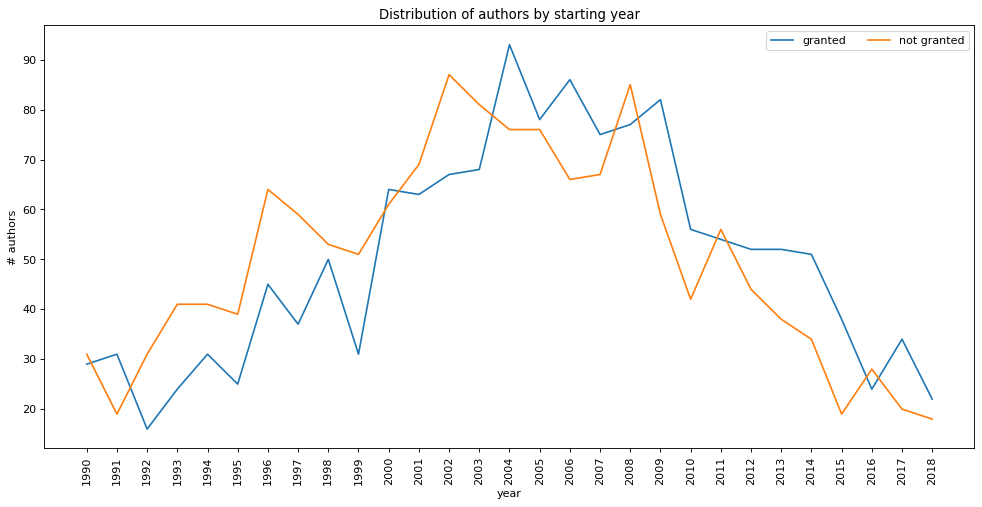

In [5]:
# Distribution of granted and not granted by starting year

plt.figure(figsize=(15, 7), dpi=80)
plt.title("Distribution of authors by starting year")
plt.xlabel("year")
plt.ylabel("# authors")

granted_dist = []
not_granted_dist = []
print("start_year\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for y in YEARS[1:]:
    num_granted = len(granted[granted["start_year"] == int(y)])
    num_not_granted = len(not_granted[not_granted["start_year"] == int(y)])
    granted_dist.append(num_granted)
    not_granted_dist.append(num_not_granted)
    print(y+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))

plt.plot(YEARS[1:], granted_dist, label="granted")
plt.plot(YEARS[1:], not_granted_dist, label="not granted")

plt.legend(ncol=2)
plt.xticks(YEARS[1:], rotation=90)
plt.show()

## Distributions by granting year

anr_year		#granted	#not_granted
____		________	____________

1990		0		0
1991		0		0
1992		0		0
1993		0		0
1994		0		0
1995		0		0
1996		0		0
1997		0		0
1998		0		0
1999		0		0
2000		0		0
2001		0		0
2002		0		0
2003		0		0
2004		0		19
2005		0		43
2006		0		58
2007		0		71
2008		0		96
2009		0		110
2010		242		131
2011		257		144
2012		239		139
2013		190		198
2014		191		214
2015		179		232
2016		157		0
2017		0		0
2018		0		0


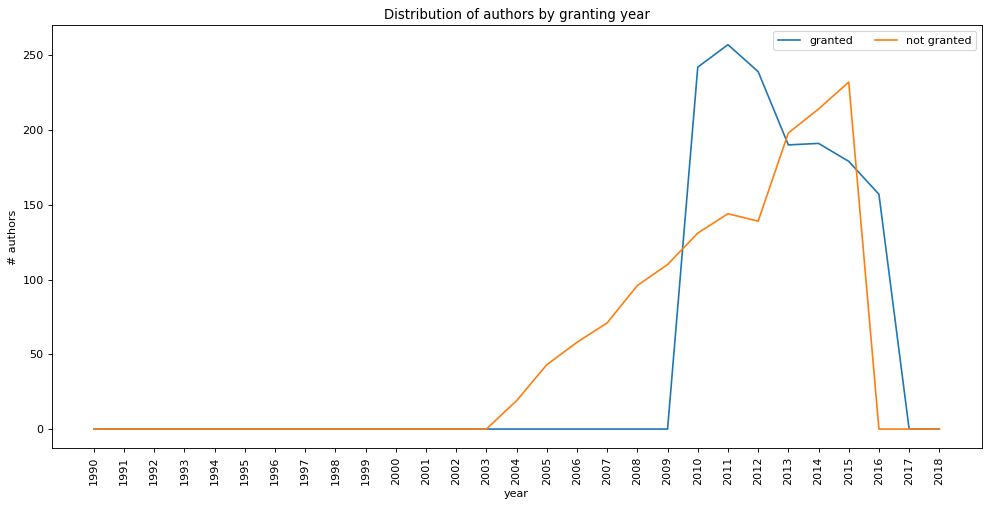

In [6]:
# Distribution of granted and not granted by anr year

plt.figure(figsize=(15, 7), dpi=80)
plt.title("Distribution of authors by granting year")
plt.xlabel("year")
plt.ylabel("# authors")

granted_dist = []
not_granted_dist = []
print("anr_year\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for y in YEARS[1:]:
    num_granted = len(granted[granted["anr_year"] == int(y)])
    num_not_granted = len(not_granted[not_granted["anr_year"] == int(y)])
    granted_dist.append(num_granted)
    not_granted_dist.append(num_not_granted)
    print(y+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))
    
    

plt.plot(YEARS[1:], granted_dist, label="granted")
plt.plot(YEARS[1:], not_granted_dist, label="not granted")

plt.legend(ncol=2)
plt.xticks(YEARS[1:], rotation=90)
plt.show()
    

## Distributions by hole size

hs		#granted	#not_granted
____		________	____________

0		442		454
1		258		220
2		203		196
3		183		172
4		98		100
5		74		81
6		52		68
7		52		46
8		28		29
9		14		32
10		13		11
11		11		14
12		10		11
13		2		6
14		10		1
15		3		4
16		0		1
17		0		3
18		1		3
19		0		2
20		0		1
21		0		0
22		0		0
23		0		0
24		0		0
25		1		0
26		0		0
27		0		0


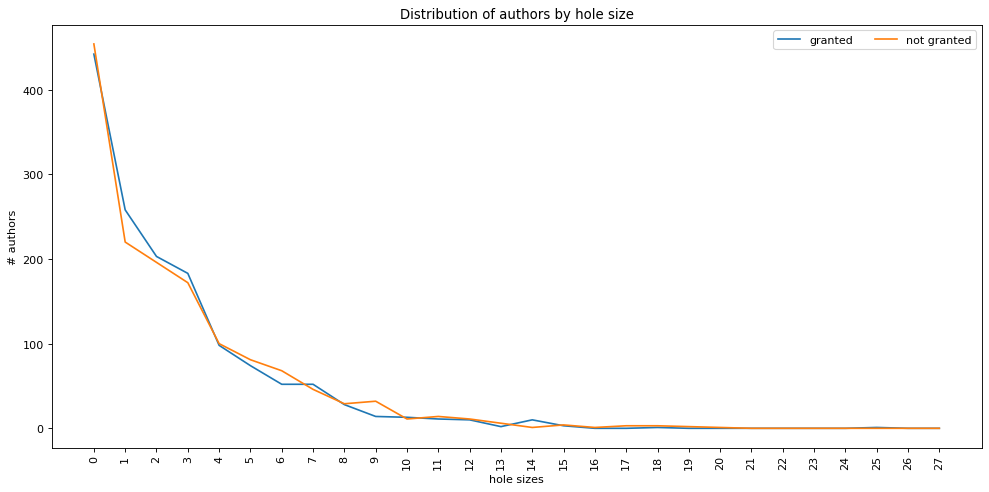

In [7]:
# Distribution of granted and not granted by hole size

plt.figure(figsize=(15, 7), dpi=80)
plt.title("Distribution of authors by hole size")
plt.xlabel("hole sizes")
plt.ylabel("# authors")

granted_dist = []
not_granted_dist = []
print("hs\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for hs in range(0,28):
    num_granted = len(granted[granted["max_hole_size"] == int(hs)])
    num_not_granted = len(not_granted[not_granted["max_hole_size"] == int(hs)])
    granted_dist.append(num_granted)
    not_granted_dist.append(num_not_granted)
    print(str(hs)+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))
    
    

plt.plot(range(0,28), granted_dist, label="granted")
plt.plot(range(0,28), not_granted_dist, label="not granted")

plt.legend(ncol=2)
plt.xticks(range(0,28), rotation=90)
plt.show()
    

## Distribution by activity

anr_year		#granted	#not_granted
____		________	____________

0		326		345
1		39		49
2		39		53
3		55		34
4		46		52
5		38		28
6		41		47
7		45		34
8		48		51
9		59		48
10		56		52
11		58		40
12		62		63
13		59		46
14		44		57
15		51		55
16		52		33
17		51		39
18		44		52
19		30		39
20		34		38
21		25		29
22		26		44
23		23		25
24		28		27
25		17		25
26		17		18
27		25		16


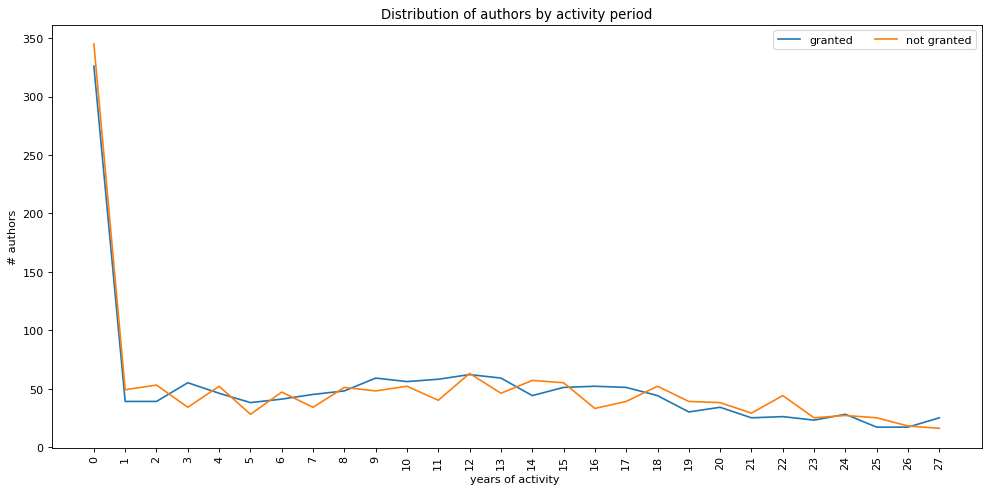

In [8]:
# Distribution of granted and not granted by activity period
plt.figure(figsize=(15, 7), dpi=80)
plt.title("Distribution of authors by activity period")
plt.xlabel("years of activity ")
plt.ylabel("# authors")

granted_dist = []
not_granted_dist = []
print("anr_year\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for activity in range(0,28):
    num_granted = len(granted[granted["activity"] == int(activity)])
    num_not_granted = len(not_granted[not_granted["activity"] == int(activity)])
    granted_dist.append(num_granted)
    not_granted_dist.append(num_not_granted)
    print(str(activity)+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))
    
    

plt.plot(range(0,28), granted_dist, label="granted")
plt.plot(range(0,28), not_granted_dist, label="not granted")

plt.legend(ncol=2)
plt.xticks(range(0,28), rotation=90)
plt.show()
    

## Distribution by number of publications

#pubs		#granted	#not_granted
____		________	____________

0		0		0
1		293		310
2		161		176
3		111		117
4		68		83
5		64		71
6		56		44
7		44		33
8		35		41
9		26		36
...


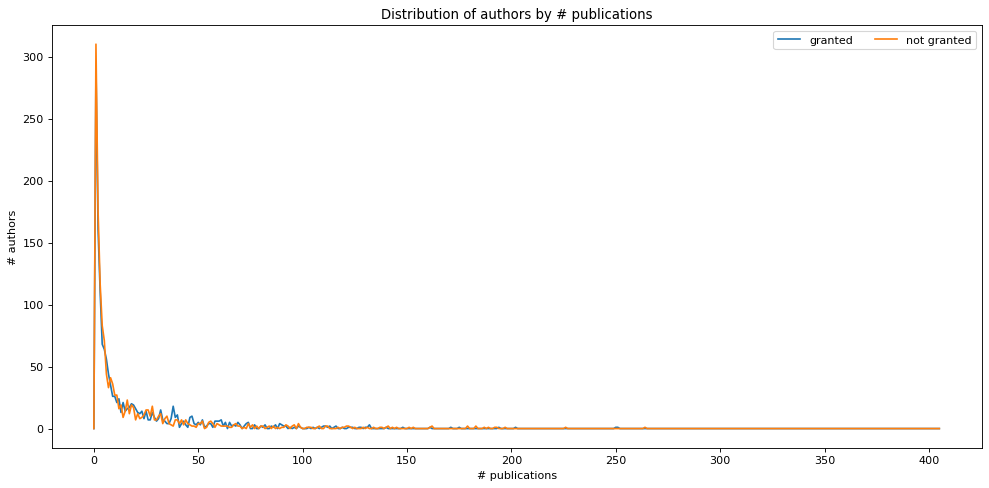

In [9]:
# Distribution of granted and not granted by number of publications

plt.figure(figsize=(15, 7), dpi=80)
plt.title("Distribution of authors by # publications")
plt.xlabel("# publications")
plt.ylabel("# authors")

granted_dist = []
not_granted_dist = []
print("#pubs\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")

max_pub_num = np.max(foc_con["tot_pubs"].values)
rng = [i for i in range(0,max_pub_num)]
for hs in rng:
    num_granted = len(granted[granted["tot_pubs"] == int(hs)])
    num_not_granted = len(not_granted[not_granted["tot_pubs"] == int(hs)])
    granted_dist.append(num_granted)
    not_granted_dist.append(num_not_granted)
    if(hs < 10):
        print(str(hs)+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))
print("...")
    

plt.plot(rng, granted_dist, label="granted")
plt.plot(rng, not_granted_dist, label="not granted")

plt.legend(ncol=2)
plt.show()
    

## filtering focal and control data

In [10]:
# choose filtering params
hs = 7
activity = 5
pubs_num = 3

In [11]:
# filter

sub_df = foc_con[foc_con["max_hole_size"] <= hs]
sub_df = sub_df[sub_df["activity"] >= activity]
sub_df = sub_df[sub_df["tot_pubs"] >= pubs_num]

# filter out those groups with less then 2 authors in it
valid_grps = []
for g in get_all_groups():
    if(len(sub_df[sub_df["group"] == g]) >= 2):
        valid_grps.append(g)

sub_df = sub_df[sub_df["group"].isin(valid_grps)]

print("percentage of data:", int((len(sub_df)/len(foc_con))*100), "%")

sub_df

percentage of data: 34 %


,ID,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,start_year,end_year,max_hole_size,activity,tot_pubs
0,12766889900,100,1,2016,0,0,0,0,0,0,...,40,40,40,40,40,2006,2014,3,8,6
1,23569685800,100,0,2015,0,0,0,0,0,0,...,29,33,37,43,46,2007,2018,1,11,38
4,24772993800,1003,1,2011,0,0,0,0,0,0,...,31,41,41,46,46,2007,2017,1,10,22
5,22135343900,1003,0,2015,0,0,0,0,0,0,...,64,72,81,87,103,2006,2018,0,12,102
12,24779807500,1008,1,2010,0,0,0,0,0,0,...,25,26,28,31,39,2008,2018,0,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,19638743800,961,0,2009,0,0,0,0,0,0,...,13,15,15,16,16,2003,2017,4,14,9
2900,24502644700,972,1,2012,0,0,0,0,0,0,...,6,8,10,10,13,2009,2018,1,9,17
2901,6602610772,972,0,2013,0,0,0,0,0,0,...,13,13,13,13,13,2004,2013,6,9,4
2904,24721004600,986,1,2012,0,0,0,0,0,0,...,19,19,19,19,30,2009,2018,3,9,5


## (1.2) Given a group, how close are the starting years of its members?

In [12]:
groups = foc_con["group"]

#retrieve the absolute distance between the starting year of authors in the same group 
abs_dists = [] 

for g in groups:
    foc_start_y = granted[granted["group"] == g]["start_year"].values[0]
    con_start_y = not_granted[not_granted["group"] == g]["start_year"].values[0]
    dist = abs(foc_start_y - con_start_y)
    abs_dists.append(dist)

# get the average distance between starting years of authors in the same group
avg_dist = np.average(abs_dists)

print("In average the absolute distance between starting years of authors in the same group is", avg_dist)

In average the absolute distance between starting years of authors in the same group is 7.804810996563574


## Groups distribution by distance

distance 0 : 112
distance 1 : 262
distance 2 : 202
distance 3 : 250
distance 4 : 228
distance 5 : 202
distance 6 : 172
distance 7 : 188
distance 8 : 140
distance 9 : 156
distance 10 : 128
distance 11 : 114
distance 12 : 126
distance 13 : 88
distance 14 : 120
distance 15 : 100
distance 16 : 60
distance 17 : 60
distance 18 : 46
distance 19 : 52
distance 20 : 26
distance 21 : 22
distance 22 : 14
distance 23 : 16
distance 24 : 6
distance 25 : 2
distance 26 : 6
distance 27 : 8


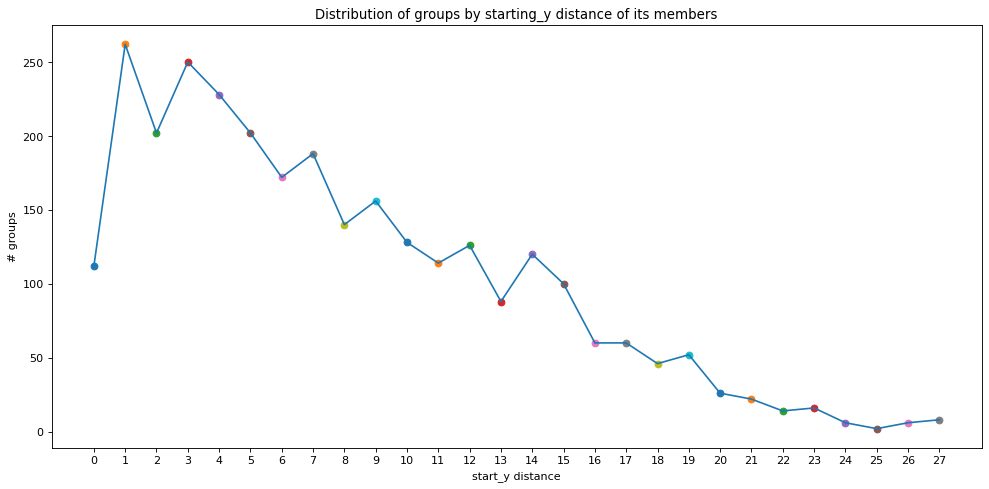

In [13]:
# For the given distance (between focal_start_year and control_start_year), check the number of groups which memebers have a starting year distance d
plt.figure(figsize=(15, 7), dpi=80)
plt.title("Distribution of groups by starting_y distance of its members")
plt.xlabel("start_y distance")
plt.ylabel("# groups")

dist = []
for d in range(0,28):
    chosen_groups = get_groups_by_dist(d) # return all group which memebers have a starting year distance == d
    print("distance", d, ":", len(chosen_groups))
    dist.append(len(chosen_groups))
    
    plt.scatter(d,len(chosen_groups))
    
plt.plot(range(0,28), dist)
plt.xticks(range(0,28))
plt.show()